<a href="https://colab.research.google.com/github/AruntejaLonka/electricity_bill_calculator/blob/main/EDM_MRR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
path = '/content/MRR data1.xlsx'

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

In [3]:
df = pd.read_excel(path)

In [4]:
df.head()

,Current(I),P_on,P_off,V,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,MRR
0,4,100,50,30,400,200,120,5000,3000,1500,20000,12000,150000,6000,600000,29.339853
1,12,100,50,30,1200,600,360,5000,3000,1500,60000,36000,150000,18000,1800000,638.141809
2,4,1000,50,30,4000,200,120,50000,30000,1500,200000,120000,1500000,6000,6000000,66.014670
3,12,1000,50,30,12000,600,360,50000,30000,1500,600000,360000,1500000,18000,18000000,95.354523
4,4,100,100,30,400,400,120,10000,3000,3000,40000,12000,300000,12000,1200000,73.349633


In [5]:
numerical_features = df.columns

In [6]:
#Assign the value in X and Y
X = df.drop(columns=['MRR'], axis=1)
y = (df['MRR'])

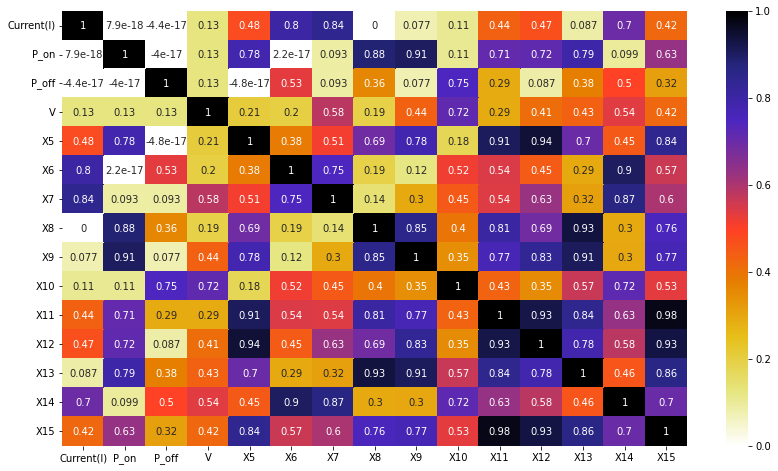

In [7]:
# Heatmap:
plt.figure(figsize=(14,8))
sns.heatmap(X.corr(),annot=True,cmap=plt.cm.CMRmap_r)

In [8]:
import numpy as np# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [9]:
corr_features = correlation(X, 0.7)
len(set(corr_features))

11

In [10]:
df_copy = df.drop(corr_features,axis=1)

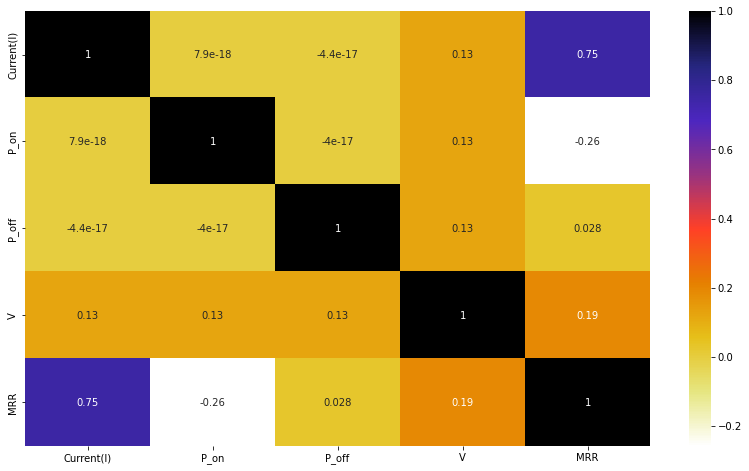

In [11]:
plt.figure(figsize=(14,8))
sns.heatmap(df_copy.corr(),annot=True,cmap=plt.cm.CMRmap_r)

In [12]:
#Assign the value in X and Y
X = df_copy.drop(columns=['MRR'], axis=1)
y = (df['MRR'])

In [91]:
#Creat test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.45, random_state=50)
print(X_train.shape)
print(X_test.shape)

(8, 4)
(8, 4)


In [92]:
#import the packages
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [94]:
#check the score
reg.score(X_train, y_train)

0.6686255530973668

In [95]:
reg.score(X_test, y_test)

0.5315424253593061

In [96]:
#check the coefficeint
reg.coef_

array([43.78056235, -0.09576202,  0.25672372, -1.22249389])

In [97]:
#get the X_train and X-test value
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [98]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 16116.967856480233
RMSE : 126.95262051836596
MAE : 104.98166259168407
R2 : 0.6686255530973668
Adjusted R2 : 0.22679295722718917


In [99]:
# Create an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.5333287114176108 0.6686230184614181


In [100]:
#get the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [101]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 16117.091132871925
RMSE : 126.95310603869416
MAE : 105.04302745205376
R2 : 0.6686230184614181
Adjusted R2 : 0.22678704307664233


In [102]:
#importing train test split & some important metrics

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_log_error , mean_squared_error

In [103]:
#Random forest implementation

from sklearn.ensemble import RandomForestRegressor

est_rf = RandomForestRegressor(criterion="mse", n_estimators=5, max_depth=10)
est_rf.fit(X_train, y_train)
rf_pred = est_rf.predict(X_test)
rf_pred

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


array([ 63.0806846 ,  45.47677262, 459.16870416, 258.19070905,
        54.27872861, 462.10268949, 494.37652812,  55.74572127])

In [104]:
#examining metrics 

print ("Training Score : " , est_rf.score(X_train, y_train))

print ("Validation Score : ", est_rf.score(X_test, y_test))

print ("Cross Validation Score : " , cross_val_score(est_rf, X_train, y_train, cv=5).mean())

print ("R2_Score : ", r2_score(rf_pred, y_test))

print ("RMSE : ", np.sqrt(mean_squared_log_error(rf_pred, y_test)))

Training Score :  0.9660066371681394
Validation Score :  0.7847396730777823
Cross Validation Score :  nan
R2_Score :  0.6153179595190492
RMSE :  0.40394150324518874


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:79

In [105]:
#implementing Linear regression

from sklearn.linear_model import LinearRegression

est_lr = LinearRegression()
est_lr.fit(X_train, y_train)
lr_pred = est_lr.predict(X_test)
lr_pred

array([-14.66992665,  71.51589242, 421.7603912 , 359.41320293,
         9.16870416, 335.57457213, 408.92420538,  58.6797066 ])

In [106]:
print ("Training Score : " , est_lr.score(X_train, y_train))

print ("Validation Score : ", est_lr.score(X_test, y_test))

print ("Cross Validation Score : " , cross_val_score(est_lr, X_train, y_train, cv=5).mean())

print ("R2_Score : ", r2_score(lr_pred, y_test))

Training Score :  0.6686255530973668
Validation Score :  0.5315424253593061
Cross Validation Score :  nan
R2_Score :  0.016557865064993793


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Decision Tree

In [107]:
#implementation of decision tree

from sklearn.tree import DecisionTreeRegressor

est_dt = DecisionTreeRegressor(criterion="mse", max_depth=10)
est_dt.fit(X_train, y_train)
dt_pred = est_dt.predict(X_test)
dt_pred

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


array([ 73.34963325,  73.34963325, 366.74816626,  95.35452323,
        22.00488998, 462.10268949, 638.14180929,  73.34963325])

In [110]:
#examining metrics

print ("Training Score : " , est_dt.score(X_train, y_train))

print ("Validation Score : ", est_dt.score(X_test, y_test))

print ("Cross Validation Score : " , cross_val_score(est_dt, X_train, y_train, cv=2).mean())

print ("R2_Score : ", r2_score(dt_pred, y_test))

print ("RMSE : ", np.sqrt(mean_squared_log_error(dt_pred, y_test)))

Training Score :  1.0
Validation Score :  0.95169063575012
Cross Validation Score :  0.16656231995561116
R2_Score :  0.93077609149105
RMSE :  0.4103125183861728


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


In [113]:
est_dt.predict(X)

array([ 29.3398533 , 638.14180929,  22.00488998,  95.35452323,
        73.34963325, 366.74816626,  22.00488998, 462.10268949,
        73.34963325, 638.14180929,  73.34963325,  95.35452323,
        73.34963325, 366.74816626,  73.34963325, 462.10268949])

In [112]:
X

,Current(I),P_on,P_off,V
0,4,100,50,30
1,12,100,50,30
2,4,1000,50,30
3,12,1000,50,30
4,4,100,100,30
5,12,100,100,30
6,4,1000,100,30
7,12,1000,100,60
8,4,100,50,60
9,12,100,50,60


In [114]:
df_2 = X

In [115]:
df_2['MRR_pre']=est_dt.predict(X)

In [116]:
df_2

,Current(I),P_on,P_off,V,MRR_pre
0,4,100,50,30,29.339853
1,12,100,50,30,638.141809
2,4,1000,50,30,22.004890
3,12,1000,50,30,95.354523
4,4,100,100,30,73.349633
5,12,100,100,30,366.748166
6,4,1000,100,30,22.004890
7,12,1000,100,60,462.102689
8,4,100,50,60,73.349633
9,12,100,50,60,638.141809


In [121]:
path = '/content/MRR3.xlsx'

In [122]:
df3 = pd.read_excel(path)

In [123]:
x = df3

In [124]:
df3['MRR_pre']=est_dt.predict(x)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- T_OFF
- T_ON
Feature names seen at fit time, yet now missing:
- P_off
- P_on

  warnings.warn(message, FutureWarning)


In [125]:
df3

,Current(I),T_ON,T_OFF,V,MRR_pre
0,4,100,50,30,29.339853
1,12,100,50,30,638.141809
2,4,1000,50,30,22.004890
3,12,1000,50,30,95.354523
4,4,100,100,30,73.349633
5,12,100,100,30,366.748166
6,4,1000,100,30,22.004890
7,12,1000,100,60,462.102689
8,4,100,50,60,73.349633
9,12,100,50,60,638.141809
